In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix


In [35]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)[['sepal length (cm)', 'petal length (cm)']]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

C:\Users\Freef\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


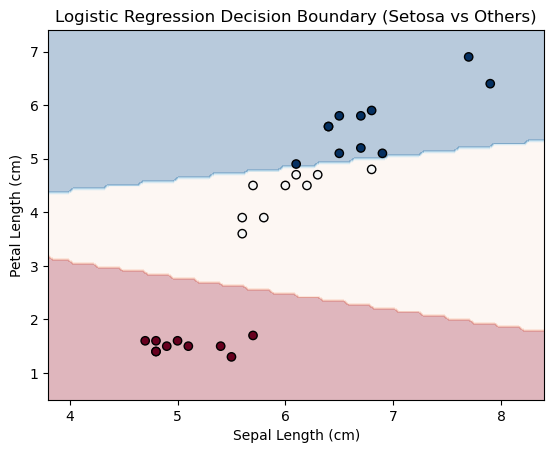

In [37]:
x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
y_min, y_max = X.iloc[:, 1].min() - 0.5, X.iloc[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                     np.linspace(y_min, y_max, 100))

# Predict class for each grid point
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundary and data points
plt.contourf(xx, yy, Z, alpha=0.3, cmap='RdBu')
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_test, edgecolors='k', cmap='RdBu')
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.title("Logistic Regression Decision Boundary (Setosa vs Others)")
plt.show()